# Verkehrszählung - Views erstellen

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
!pip install seaborn

!pip install folium
import folium # plotting library

## 1) Verkehrszählung

## 1.1) Datensatz einlesen

In [3]:
df_verkehrszaehlung_2020 = pd.read_csv('./data/verkehrszaehlung_2020_mit_quartier_kreis.csv', low_memory=False)

In [4]:
df_verkehrszaehlung_2020.shape

(399672, 36)

In [5]:
df_verkehrszaehlung_2020.head()

,Unnamed: 0,MSID,MessungDatum,ZeitKategorie,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus,MessungZeit,Jahr,Monat,Tag,Wochentag,MonatText,Jahreszeit,Koord_WGS84_E,Koord_WGS84_N,Kreis,Quartier,Verkehrsaufkommen
0,0,Z001M001,2020-01-01,Nacht,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 00:00:00,2021-02-04,1020.0,Gemessen,00:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
1,1,Z001M001,2020-01-01,Rushhour_Morgen,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 06:00:00,2021-02-04,168.0,Gemessen,06:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
2,2,Z001M001,2020-01-01,Morgen,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 10:00:00,2021-02-04,314.0,Gemessen,10:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
3,3,Z001M001,2020-01-01,Nachmittag,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 13:00:00,2021-02-04,586.0,Gemessen,13:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
4,4,Z001M001,2020-01-01,Rushhour_Abend,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 16:00:00,2021-02-04,805.0,Gemessen,16:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering


In [6]:
# Total gemessene Fahrzeuge
df_verkehrszaehlung_2020['AnzFahrzeuge'].sum()

482597380.0

In [7]:
#Total gemessene Fahrzeuge pro Messstation 2020
df_verkehrszaehlung_2020.groupby('ZSName').agg({'AnzFahrzeuge': 'sum'})

,AnzFahrzeuge
ZSName,
A3W (A4 Uetlibergtunnel Brunau),10508879.0
A3W (Chur Brunau),10115643.0
Albisriederstrasse (Hubertus),3723119.0
Albisriederstrasse (Lyrenweg),2548938.0
Albisstrasse (Widmerstrasse),5595914.0
Alfred-Escher-Strasse (Ulmbergtunnel),6081867.0
Allmendstrasse (Brunau),4204486.0
Am Wasser (Hardeggstrasse),322701.0
Angererstrasse Tunnelstrasse (Ulmbergtunnel),2085849.0


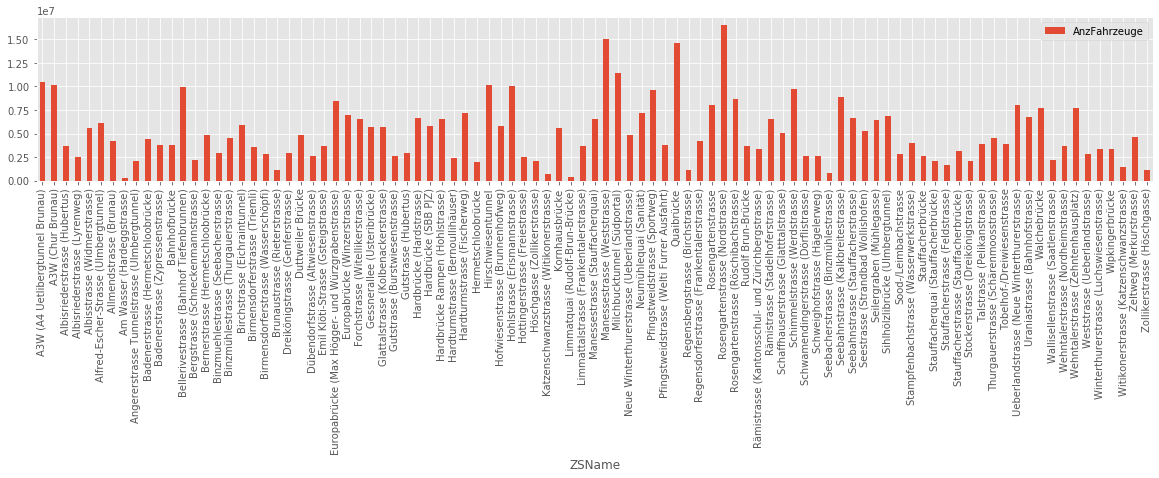

In [8]:
#df_verkehrszaehlung_2020['ZSName']
df_verkehrszaehlung_2020.groupby('ZSName').agg({'AnzFahrzeuge': 'sum'}).plot(kind='bar', figsize=(20, 3))
plt.show()

In [9]:
#Total gemessene Fahrzeuge nach Tageszeit pro Messstation 2020 
df_verkehrszaehlung_2020.groupby(['ZSName', 'ZeitKategorie']).agg({'AnzFahrzeuge': 'sum'})

AnzFahrzeuge
ZSName                                            ZeitKategorie                
A3W (A4 Uetlibergtunnel Brunau)                   Abend               1088632.0
                                                  Morgen              1752697.0
                                                  Nachmittag          1976325.0
                                                  Nacht                507863.0
                                                  Rushhour_Abend      2919575.0
                                                  Rushhour_Morgen     2263787.0
A3W (Chur Brunau)                                 Abend               1113767.0
                                                  Morgen              1737647.0
                                                  Nachmittag          1918116.0
                                                  Nacht                537054.0
                                                  Rushhour_Abend      2775578.0
                                                  Rushhour_Morgen     2033481.0
Albisriederstrasse (Hubertus)                     Abend                479742.0
                                                  Morgen               643046.0
                                                  Nachmittag           700076.0
                                                  Nacht                226632.0
                                                  Rushhour_Abend       896399.0
                                                  Rushhour_Morgen      777224.0
Albisriederstrasse (Lyrenweg)                     Abend                191791.0
                                                  Morgen               421105.0
                                                  Nachmittag           488555.0
                                                  Nacht                 72033.0
                                                  Rushhour_Abend       766627.0
                                                  Rushhour_Morgen      608827.0
Albisstrasse (Widmerstrasse)                      Abend                518048.0
                                                  Morgen               995742.0
                                                  Nachmittag          1116767.0
                                                  Nacht                180971.0
                                                  Rushhour_Abend      1567380.0
                                                  Rushhour_Morgen     1217006.0
Alfred-Escher-Strasse (Ulmbergtunnel)             Abend                801747.0
                                                  Morgen              1091933.0
                                                  Nachmittag          1167448.0
                                                  Nacht                322570.0
                                                  Rushhour_Abend      1469368.0
                                                  Rushhour_Morgen     1228801.0
Allmendstrasse (Brunau)                           Abend                422793.0
                                                  Morgen               755274.0
                                                  Nachmittag           839926.0
                                                  Nacht                194791.0
                                                  Rushhour_Abend      1115222.0
                                                  Rushhour_Morgen      876480.0
Am Wasser (Hardeggstrasse)                        Abend                 26080.0
                                                  Morgen                49362.0
                                                  Nachmittag            64388.0
                                                  Nacht                 11300.0
                                                  Rushhour_Abend       100331.0
                                                  Rushhour_Morgen       71240.0
Angererstrasse Tunnelstrasse (Ulmbergtunnel)      Abend            

## 1.2) Map Plots

### 1.2.1) Messstationen

In [10]:
df_gr = df_verkehrszaehlung_2020.groupby('ZSName').agg({'ZSName':'first','AnzFahrzeuge':'sum', 'Koord_WGS84_E':'first', 'Koord_WGS84_N':'first'})
real_df = pd.DataFrame(df_gr)

In [13]:
# Farbgruppe nach Unfalltyp
out_lst_grpType = df_gr.AnzFahrzeuge.unique()
out_df_grpType = pd.DataFrame(out_lst_grpType) 
out_df_grpType = out_df_grpType.rename(columns={0: "AnzFahrzeuge"})
out_df_grpType['colorGrp'] = out_df_grpType.apply(lambda x : list(np.random.choice(range(256), size=3)), axis=1)


In [12]:
df_gr.head()

,ZSName,AnzFahrzeuge,Koord_WGS84_E,Koord_WGS84_N
ZSName,,,,
A3W (A4 Uetlibergtunnel Brunau),A3W (A4 Uetlibergtunnel Brunau),10508879.0,47.347115,8.520002
A3W (Chur Brunau),A3W (Chur Brunau),10115643.0,47.347055,8.520122
Albisriederstrasse (Hubertus),Albisriederstrasse (Hubertus),3723119.0,47.377470,8.499435
Albisriederstrasse (Lyrenweg),Albisriederstrasse (Lyrenweg),2548938.0,47.374504,8.482991
Albisstrasse (Widmerstrasse),Albisstrasse (Widmerstrasse),5595914.0,47.334167,8.529921


In [14]:
df_gr = pd.merge(df_gr, out_df_grpType, on='AnzFahrzeuge')

In [15]:
# Zürich lon, lat
latitude = 47.36667
longitude = 8.55

In [17]:
def create_circleMarkerMap(df, latitude, longitude):
    map = folium.Map(location=[latitude, longitude], zoom_start=12)
    for lat, lng, colo in zip(df['Koord_WGS84_E'], df['Koord_WGS84_N'], df['colorGrp']):
            folium.CircleMarker(
                    [lat, lng],
                    radius=3,
                    fill=True,
                    fill_opacity=0.7,
                    parse_html = False).add_to(map)  
            
    return map

In [18]:
create_circleMarkerMap(df_gr, latitude, longitude)

### 1.2.2) Anzahl Fahrzeuge pro Kreis

In [19]:
def create_kreis_choropleth(df, map_path, latitude, longitude):
    map = folium.Map(location=[latitude, longitude], zoom_start=12)

    folium.Choropleth(
        geo_data=map_path,
        name='Number of Cars',
        data=df,
        columns=['Kreis','MSID'],
        key_on='feature.properties.bezeichnung',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        legend_name='Number of Cars'
    ).add_to(map) 

    folium.LayerControl().add_to(map)

    return map

In [20]:
map_path = './data/Stadtkreise_ZH/stzh.adm_stadtkreise_a.geojson'

In [21]:
x = df_verkehrszaehlung_2020[['Kreis','MSID']].groupby(['Kreis'])
z = x.count().reset_index()

In [22]:
create_kreis_choropleth(z, map_path, latitude, longitude)